In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer




In [13]:
! pip install wordcloud

In [14]:
   from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [15]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [16]:
data = pd.read_csv("C:\\Users\SURESH SHAH\Desktop\\ML\\Datasets\\filename.csv")


In [17]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1547406913754861568,1547406913754861568,2022-07-14 02:25:32 UTC,2022-07-14,02:25:32,0,261109532,fareasterner,Andrey Davydov,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1547406911015895040,1547304732078661638,2022-07-14 02:25:31 UTC,2022-07-14,02:25:31,0,17953899,phbehnken,phbehnken🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JohnWold20', 'name': 'Crackl...",NaN,NaN,NaN,NaN
2,1547406903063355392,1547355158186979328,2022-07-14 02:25:29 UTC,2022-07-14,02:25:29,0,43260323,ka_fredo,Bantay Tayo,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'societyofhonor', 'name': 'Jo...",NaN,NaN,NaN,NaN
3,1547406900186255362,1547322383471706114,2022-07-14 02:25:29 UTC,2022-07-14,02:25:29,0,451636645,hossjd,JD Hoss,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SenJohnKennedy', 'name': 'Jo...",NaN,NaN,NaN,NaN
4,1547406899963764736,1546132436613877763,2022-07-14 02:25:29 UTC,2022-07-14,02:25:29,0,1422363211710435328,julezrulez10,Julezrulez,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Car00291782John', 'name': 'J...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,1547346900935917568,1547346900935917568,2022-07-13 22:27:04 UTC,2022-07-13,22:27:04,0,1263898793012916224,marketscafe,Market’s Cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10000,1547346899572850690,1547344307841126400,2022-07-13 22:27:03 UTC,2022-07-13,22:27:03,0,541060883,7zeejay7,zaheer jaffery,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10001,1547346886817980417,1547226103978364930,2022-07-13 22:27:00 UTC,2022-07-13,22:27:00,0,424200253,tanyalymar,Tetiana ♻️,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MarkSzente', 'name': 'Mark S...",NaN,NaN,NaN,NaN
10002,1547346885089820679,1546820667198275584,2022-07-13 22:27:00 UTC,2022-07-13,22:27:00,0,4830314693,views_s,James Hind 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'EraofConquest', 'name': 'Era...",NaN,NaN,NaN,NaN


In [18]:
print(data.head())

                    id      conversation_id               created_at  \
0  1547406913754861568  1547406913754861568  2022-07-14 02:25:32 UTC   
1  1547406911015895040  1547304732078661638  2022-07-14 02:25:31 UTC   
2  1547406903063355392  1547355158186979328  2022-07-14 02:25:29 UTC   
3  1547406900186255362  1547322383471706114  2022-07-14 02:25:29 UTC   
4  1547406899963764736  1546132436613877763  2022-07-14 02:25:29 UTC   

         date      time  timezone              user_id      username  \
0  2022-07-14  02:25:32         0            261109532  fareasterner   
1  2022-07-14  02:25:31         0             17953899     phbehnken   
2  2022-07-14  02:25:29         0             43260323      ka_fredo   
3  2022-07-14  02:25:29         0            451636645        hossjd   
4  2022-07-14  02:25:29         0  1422363211710435328  julezrulez10   

             name place  ... geo source user_rt_id user_rt retweet_id  \
0  Andrey Davydov   NaN  ... NaN    NaN        NaN     NaN   

In [19]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


We only need three columns for this task (username, tweet, and language); 
 I will only select these columns and move forward:

In [21]:
data = data[["username", "tweet", "language"]]

### ''' Let’s have a look at whether any of these columns contains any null values or not'''

In [23]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

'''So none of the columns has null values, let’s have a quick look 
 at how many tweets are posted in which language:'''

In [25]:
data["language"].value_counts()

en     8986
pt      461
it      126
in       78
qme      55
und      52
es       45
ja       29
ru       20
vi       14
zh       13
fi       13
qht      12
nl       11
ro       10
de        9
et        7
pl        7
tl        7
ca        7
qam       5
hi        5
ur        5
fr        4
ar        4
zxx       3
no        3
tr        3
uk        2
th        2
ml        2
ht        1
ko        1
cs        1
el        1
Name: language, dtype: int64

  So most of the tweets are in English. Let’s prepare this data 
 for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols 
  and other   language errors from the tweets:

In [27]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\SURESH
[nltk_data]     SHAH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\SURESH~1\AppData\Local\Temp/ipykernel_13808/846733388.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean)


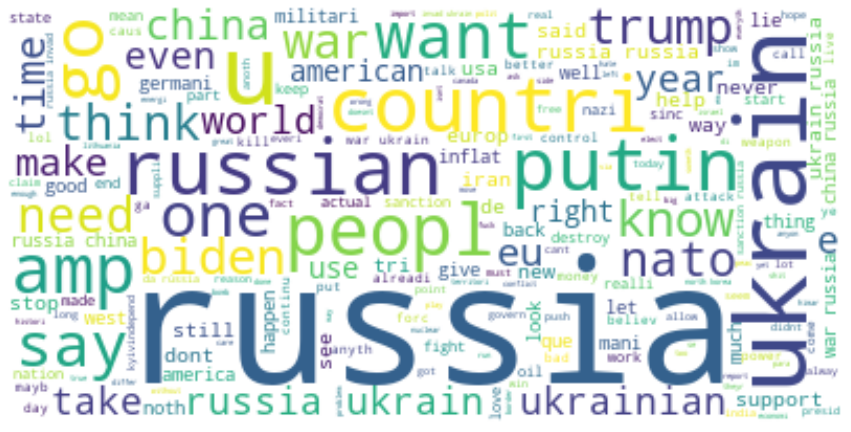

In [29]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

   Now I will add three more columns in this dataset as Positive, Negative, and Neutral 
 by calculating the sentiment scores of the tweets

In [31]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\SURESH
[nltk_data]     SHAH\AppData\Roaming\nltk_data...
C:\Users\SURESH~1\AppData\Local\Temp/ipykernel_13808/701608040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
C:\Users\SURESH~1\AppData\Local\Temp/ipykernel_13808/701608040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]


                                               tweet  Positive  Negative  \
0   ukrain defeat russia neocon live infantasi world     0.000     0.333   
1   timinhonolulu kremlinrussia interest use tech...     0.478     0.000   
2  societyofhonor china russia authoritarian coun...     0.333     0.000   
3  senjohnkennedi made think go russia celebr  ju...     0.000     0.000   
4   jennwindrow karilakewarroom karilak  trump wa...     0.104     0.143   

   Neutral  
0    0.667  
1    0.522  
2    0.667  
3    1.000  
4    0.753  


C:\Users\SURESH~1\AppData\Local\Temp/ipykernel_13808/701608040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]


Now let’s have a look at the most frequent words used by people with positive sentiments:

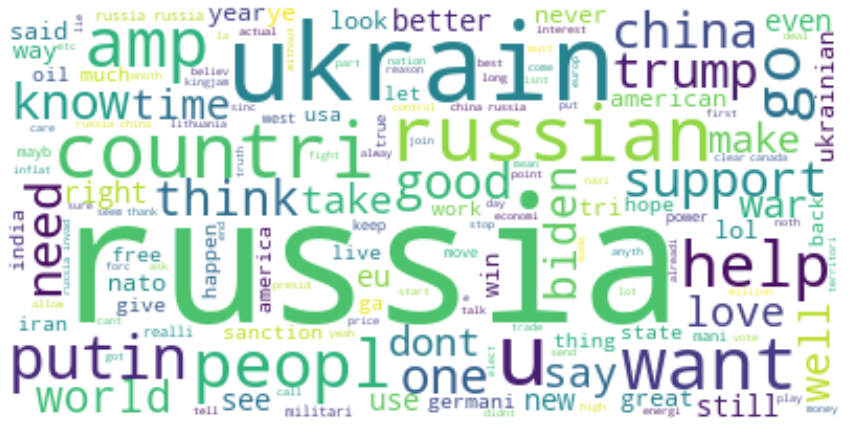

In [33]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 Now let’s have a look at the most frequent words used by people with negative sentiments:

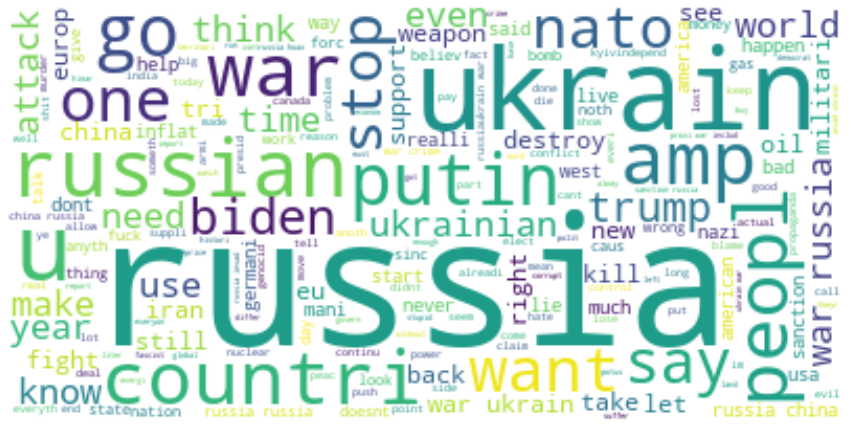

In [35]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()